In [23]:
import pandas as pd
from matplotlib import pyplot as plt

from pathlib import Path
import os


%matplotlib inline

In [24]:
dataset_name = "INFOREST1"
selected_indices = ["ACI", "NDSI", "AEI", "ADI", "Hf", "H_pairedShannon"]

In [29]:
proj_path = Path(os.getcwd()).parent
df_indices = pd.read_csv(proj_path / "output" / f"{dataset_name}_indices.csv")

In [30]:
metrics = dict()
for idx in selected_indices:
    series = df_indices[idx]
    series_norm = (series - series.min()) / (series.max() - series.min())
    metrics[idx] = (series_norm.mean(), series_norm.std())
print(metrics)

{'ACI': (0.19702548795553962, 0.16168024418451937), 'NDSI': (0.33088953998397985, 0.20550156399961356), 'AEI': (0.202475080292143, 0.19048659735148102), 'ADI': (0.9283726479897458, 0.12160352484823767), 'Hf': (0.6719616832719802, 0.17963951764653352), 'H_pairedShannon': (0.6784484913815724, 0.1773101560538899)}


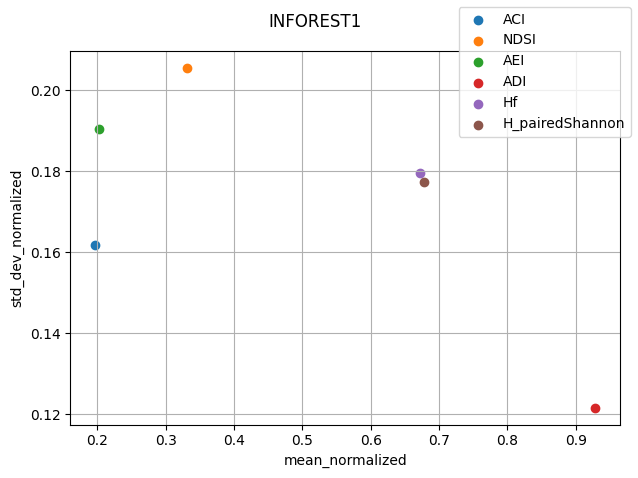

In [39]:
fig, ax = plt.subplots()

for name, vals in metrics.items():
    ax.scatter(*vals, label=name)
ax.grid()
ax.set_xlabel("mean_normalized")
ax.set_ylabel("std_dev_normalized")
fig.suptitle(dataset_name)
fig.legend()
fig.tight_layout();